Import Statements

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import scipy.constants as const
from scipy import stats
from scipy.stats import poisson
from scipy.stats import uniform

Variable Transformation

In [2]:
np.random.seed(72) #I like the number 72, so that's the seed
x = uniform.rvs(size = 1000) #generating 1000 values for x
u = x ** 2 #transforming x into u = x^2

$g(u)=f(x)|\frac{dx}{du}|=1\times |\frac{d}{du}[\sqrt{u}]|=\frac{1}{2\sqrt{u}}$

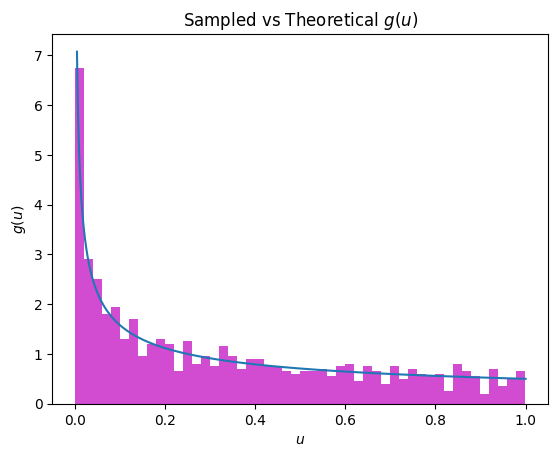

Our samples appear to match the theoretical model of $g(u)$ pretty well, as most bins are close to the height of the curve of g


In [3]:
u2 = np.linspace(0.005,1,1000) #creating u points
g = 1 / (u2 ** (0.5) * 2) #creating g(u)

plt.hist(u,color = 'm',bins = 50,alpha = 0.7,density = True)
plt.plot(u2,g)
plt.xlabel('$u$')
plt.ylabel('$g(u)$')
plt.title('Sampled vs Theoretical $g(u)$')
plt.show()

print('Our samples appear to match the theoretical model of $g(u)$ pretty well, as most bins are close to the height of the curve of g')

$x = u^{2}$

$g(u)=|\frac{d}{du}[u^{2}]|=2u$

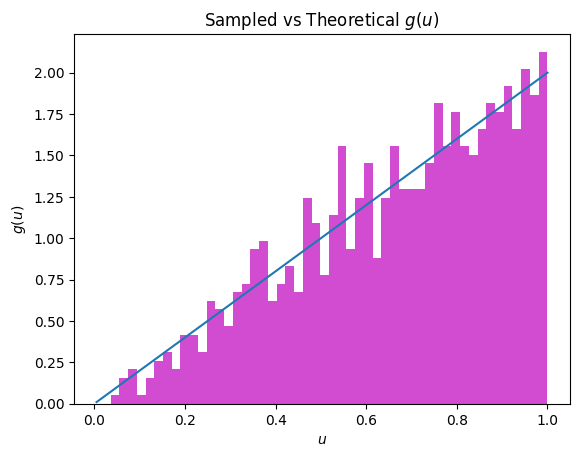

Our samples appear to match the theoretical model of $g(u)$ pretty well, as most bins are close to the height of the curve of g


In [4]:
u3 = x ** (0.5) #transforming x into u = sqrt(x)
g2 = 2 * u2 #creating g(u) using same linspace as above

plt.hist(u3,color = 'm',bins = 50,alpha = 0.7,density = True)
plt.plot(u2,g2)
plt.xlabel('$u$')
plt.ylabel('$g(u)$')
plt.title('Sampled vs Theoretical $g(u)$')
plt.show()

print('Our samples appear to match the theoretical model of $g(u)$ pretty well, as most bins are close to the height of the curve of g')

Throwing 2 Dice

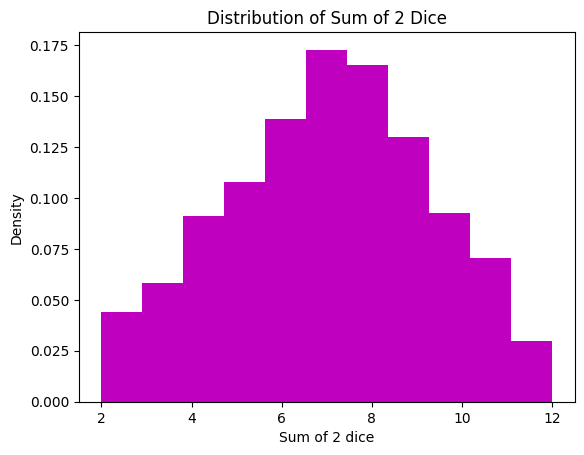

In [5]:
dice = np.random.randint(1,7,(2,1000)) #throwing 2 dice 1000 times
total = np.sum(dice,axis = 0) #adding values of the 2 dice

plt.hist(total,color = 'm',bins = 11,density = True)
plt.xlabel('Sum of 2 dice')
plt.ylabel('Density')
plt.title('Distribution of Sum of 2 Dice')
plt.show()

In [6]:
mean = np.mean(total) #calculating mean of sum of 2 dice
variance = np.var(total) #calculating variance of sum of 2 dice

print('The mean of the sum of 2 dice is',mean)
print('The variance of the sum of 2 dice is',variance)

The mean of the sum of 2 dice is 7.046
The variance of the sum of 2 dice is 6.187884


In [7]:
seven = np.count_nonzero(total == 7) #counting the number of 7s rolled
prob7 = seven / 1000 #calculating the probability of rolling a sum of 7
print('The probability of rolling a sum of 7 is',prob7)

uncertainty = np.sqrt(prob7 * (1 - prob7) / 1000)
print('The uncertainty is',uncertainty)

The probability of rolling a sum of 7 is 0.157
The uncertainty is 0.01150439046625244


Probability of a sum of 7 = number of ways to get sum of 7 / total combinations = $\frac{6}{36}=\frac{1}{6}=0.167$

Our simulated result is fairly consistent, though slightly larger, than the theoretical probability of rolling a sum of 7.

Central Limit Theorem

In [48]:
def poissonPlot(n,m = 5,l = 2): #function that generates and plots n poisson distributions
    distMean = np.zeros(n) #creating array for the mean of n poisson distributions
    distStd = np.zeros(n) #creating array for the standard deviation of n poisson distributions
    for i in np.arange(n):
        pois = stats.poisson.rvs(mu = l,size = m) #creating a poisson distribution
        distMean[i] = np.mean(pois) #adding mean of poisson distribution to above array
        distStd[i] = np.std(pois) #adding standard deviation of poisson distribution to above array
    muMean = np.mean(distMean) #calculating mean of means of n poisson distributions
    sigmaMean = np.var(distMean) #calculating variance of means of n poisson distributions
    muVar = np.mean(distStd) #calculating mean of standard deviations of n poisson distributions
    sigmaVar = np.var(distStd) #calculating variance of standard deviations of n poisson distributions

    plt.hist(distMean,color = 'm',density = True) #creating histogram for mean of n poisson distributions
    plt.xlabel('Mean of poisson')
    plt.ylabel('Density')
    plt.text(np.min(distMean),0.1,f'$\mu=${round(muMean,2)}\n$\sigma^{2}=${round(sigmaMean,2)}',backgroundcolor = 'b',c = 'w')
    plt.title('Distribution of $\mu$ for ' + str(n) + ' Poisson Distributions')
    plt.show()

    plt.hist(distStd,color = 'm',density = True) #creating historgram for standard deviation of n poisson distributions
    plt.xlabel('Standard deviation of poisson')
    plt.ylabel('Density')
    plt.text(np.min(distStd),0.1,f'$\mu=${round(muVar,2)}\n$\sigma^{2}=${round(sigmaVar,2)}',backgroundcolor = 'b',c = 'w')
    plt.title(('Distribution of $\sigma$ for ' + str(n) + ' Poisson Distributions'))
    plt.show()

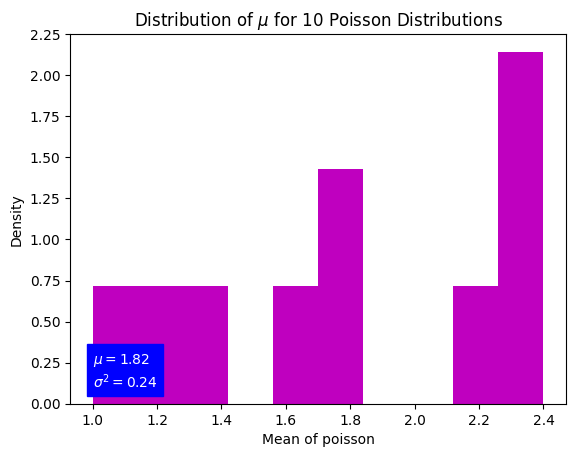

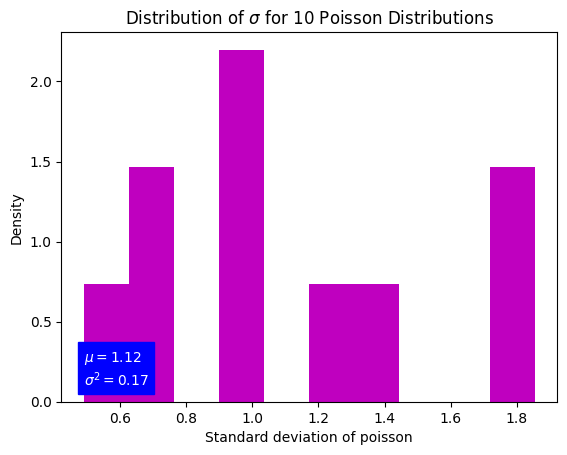

In [53]:
poissonPlot(n = 10) #plotting mean and standard deviation for 10 poisson distributions with M = 5 and lambda = 2

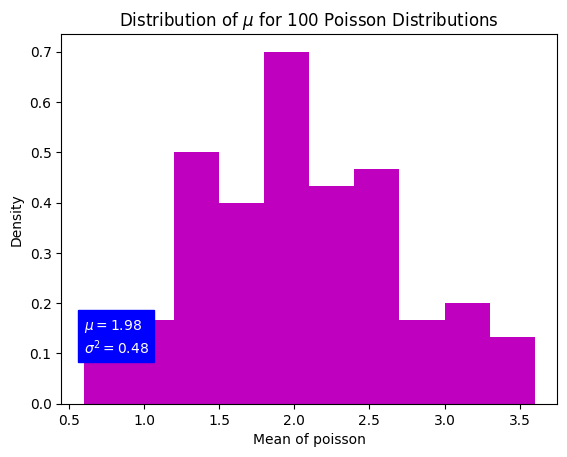

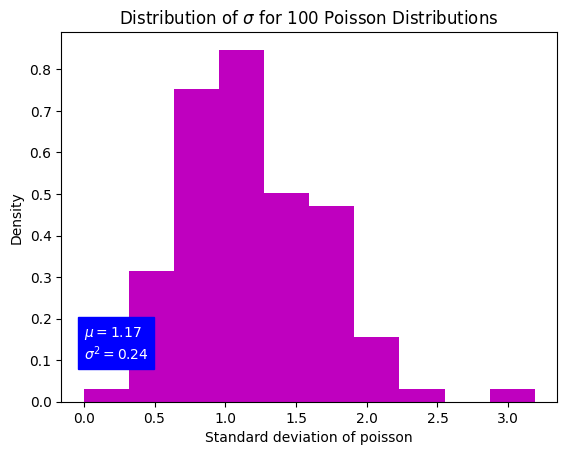

In [54]:
poissonPlot(n = 100) #plotting mean and standard deviation for 100 poisson distributions with M = 5 and lambda = 2

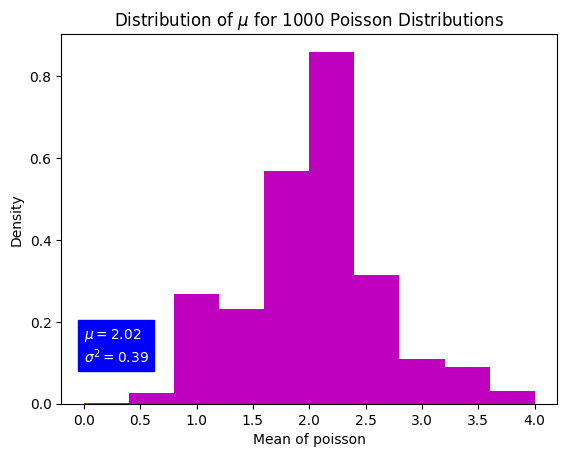

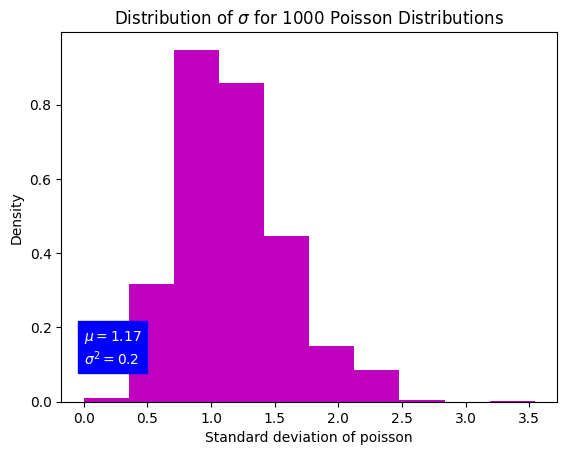

In [55]:
poissonPlot(n = 1000) #plotting mean and standard deviation for 1000 poisson distributions with M = 5 and lambda = 2

$\mu$ and $\sigma$ both approach normal distributions as N approaches a larger number.

The variance of $\mu$ and $\sigma$ approach 0.4 and 0.2 respectively as N gets larger, but there appears to be no scaling rule.

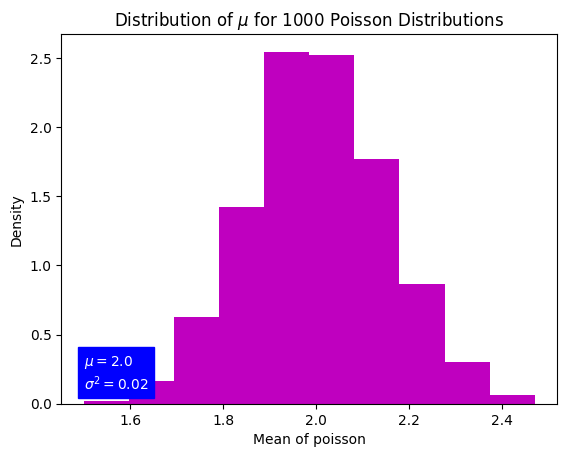

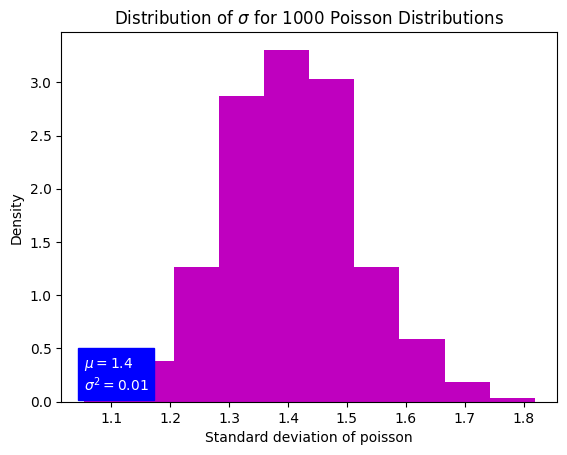

In [56]:
poissonPlot(1000,100) #plotting mean and standard deviation for 1000 poisson distributions with M = 100 and lambda = 2

The mean of $\mu$ is almost exaclty at 2 due to the larger number of events.

The variances of both $\mu$ and $\sigma$ are very small when M increases, but the variance of $\sigma$ is roughly half the variance of $\mu$, which is in alignment with with M = 5 distributions.